In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/anshc/Documents/Programming/Python/Data_analysis_practice/introProject/minWageData.csv')

act_min_wage = pd.DataFrame()


for name, group in df.groupby('State'):
    if act_min_wage.empty:
        act_min_wage = group.set_index('Year')[['Department.Of.Labor.Cleaned.Low.Value.2020.Dollars']].rename(columns={'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars':name})
    else:
        act_min_wage = act_min_wage.join(group.set_index('Year')[['Department.Of.Labor.Cleaned.Low.Value.2020.Dollars']].rename(columns={'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars':name}))

act_min_wage.head()

min_wage_corr = act_min_wage.replace(0, np.nan).dropna(axis=1).corr()

min_wage_corr.head()


,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,...,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,...,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,...,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,...,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,...,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009


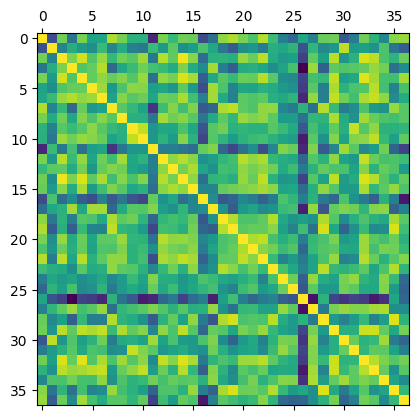

In [3]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)

TypeError: arange() not supported for inputs with DType <class 'numpy.dtypes.StrDType'>.

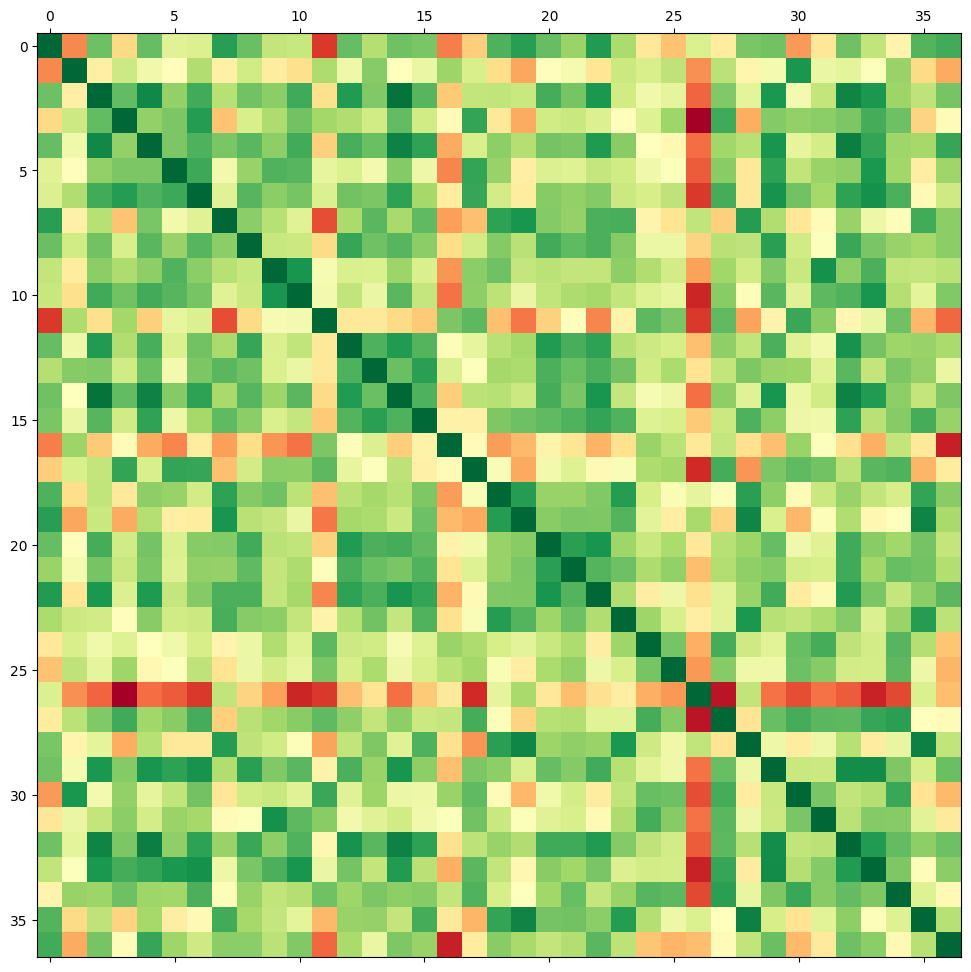

In [29]:
labels = [c[:2] for c in min_wage_corr.columns]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)


ax.set_xticks(np.arange(labels))
ax.set_yticks(np.arange(labels))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
plt.show()

In [12]:
dfs = pd.read_html("https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes")
dfs

[     State Name/District Postal Abbreviation Postal Code
 0                Alabama                Ala.          AL
 1                 Alaska              Alaska          AK
 2                Arizona               Ariz.          AZ
 3               Arkansas                Ark.          AR
 4             California              Calif.          CA
 5               Colorado               Colo.          CO
 6            Connecticut               Conn.          CT
 7               Delaware                Del.          DE
 8   District of Columbia                D.C.          DC
 9                Florida                Fla.          FL
 10               Georgia                 Ga.          GA
 11                Hawaii              Hawaii          HI
 12                 Idaho               Idaho          ID
 13              Illinois                Ill.          IL
 14               Indiana                Ind.          IN
 15                  Iowa                Iowa          IA
 16           

In [14]:
for df in dfs:
    print(df.head())

  State Name/District Postal Abbreviation Postal Code
0             Alabama                Ala.          AL
1              Alaska              Alaska          AK
2             Arizona               Ariz.          AZ
3            Arkansas                Ark.          AR
4          California              Calif.          CA
        Territory/Associate Abbreviation Postal Code
0            American Samoa          NaN          AS
1                      Guam         Guam          GU
2          Marshall Islands          NaN          MH
3                Micronesia          NaN          FM
4  Northern Mariana Islands          NaN          MP


In [15]:
state_abbv = dfs[0]
state_abbv.head()

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [16]:
state_abbv.to_csv('/Users/anshc/Documents/Programming/Python/Data_analysis_practice/introProject/state_abbv.csv')

In [19]:
state_abbv = pd.read_csv('/Users/anshc/Documents/Programming/Python/Data_analysis_practice/introProject/state_abbv.csv', index_col=0)
state_abbv.head()

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [22]:
abbv_dict = state_abbv[['Postal Code']].to_dict()
abbv_dict = abbv_dict['Postal Code']
abbv_dict

{0: 'AL',
 1: 'AK',
 2: 'AZ',
 3: 'AR',
 4: 'CA',
 5: 'CO',
 6: 'CT',
 7: 'DE',
 8: 'DC',
 9: 'FL',
 10: 'GA',
 11: 'HI',
 12: 'ID',
 13: 'IL',
 14: 'IN',
 15: 'IA',
 16: 'KS',
 17: 'KY',
 18: 'LA',
 19: 'ME',
 20: 'MD',
 21: 'MA',
 22: 'MI',
 23: 'MN',
 24: 'MS',
 25: 'MO',
 26: 'MT',
 27: 'NE',
 28: 'NV',
 29: 'NH',
 30: 'NJ',
 31: 'NM',
 32: 'NY',
 33: 'NC',
 34: 'ND',
 35: 'OH',
 36: 'OK',
 37: 'OR',
 38: 'PA',
 39: 'RI',
 40: 'SC',
 41: 'SD',
 42: 'TN',
 43: 'TX',
 44: 'UT',
 45: 'VT',
 46: 'VA',
 47: 'WA',
 48: 'WV',
 49: 'WI',
 50: 'WY'}

In [23]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]

KeyError: 'Alaska'

In [28]:
abbv_dict['Alabama'] = 'AL'
abbv_dict['Alaska'] = 'AK'
abbv_dict['Arizona'] = 'AZ'
abbv_dict['Arkansas'] = 'AR'
abbv_dict['California'] = 'CA'
abbv_dict['Colorado'] = 'CO'
abbv_dict['Connecticut'] = 'CT'
abbv_dict['Delaware'] = 'DE'
abbv_dict['Florida'] = 'FL'
abbv_dict['Georgia'] = 'GA'
abbv_dict['Hawaii'] = 'HI'
abbv_dict['Idaho'] = 'ID'
abbv_dict['Illinois'] = 'IL'
abbv_dict['Indiana'] = 'IN'
abbv_dict['Iowa'] = 'IA'
abbv_dict['Kansas'] = 'KS'
abbv_dict['Kentucky'] = 'KY'
abbv_dict['Louisiana'] = 'LA'
abbv_dict['Maine'] = 'ME'
abbv_dict['Maryland'] = 'MD'
abbv_dict['Massachusetts'] = 'MA'
abbv_dict['Michigan'] = 'MI'
abbv_dict['Minnesota'] = 'MN'
abbv_dict['Mississippi'] = 'MS'
abbv_dict['Missouri'] = 'MO'
abbv_dict['Montana'] = 'MT'
abbv_dict['Nebraska'] = 'NE'
abbv_dict['Nevada'] = 'NV'
abbv_dict['New Hampshire'] = 'NH'
abbv_dict['New Jersey'] = 'NJ'
abbv_dict['New Mexico'] = 'NM'
abbv_dict['New York'] = 'NY'
abbv_dict['North Carolina'] = 'NC'
abbv_dict['North Dakota'] = 'ND'
abbv_dict['Ohio'] = 'OH'
abbv_dict['Oklahoma'] = 'OK'
abbv_dict['Oregon'] = 'OR'
abbv_dict['Pennsylvania'] = 'PA'
abbv_dict['Rhode Island'] = 'RI'
abbv_dict['South Carolina'] = 'SC'
abbv_dict['South Dakota'] = 'SD'
abbv_dict['Tennessee'] = 'TN'
abbv_dict['Texas'] = 'TX'
abbv_dict['Utah'] = 'UT'
abbv_dict['Vermont'] = 'VT'
abbv_dict['Virginia'] = 'VA'
abbv_dict['Washington'] = 'WA'
abbv_dict['West Virginia'] = 'WV'
abbv_dict['Wisconsin'] = 'WI'
abbv_dict['Wyoming'] = 'WY'
abbv_dict['District of Columbia'] = 'DC'
abbv_dict['Guam'] = 'GU'
abbv_dict['Puerto Rico'] = 'PR'


labels = [abbv_dict[c] for c in min_wage_corr.columns]

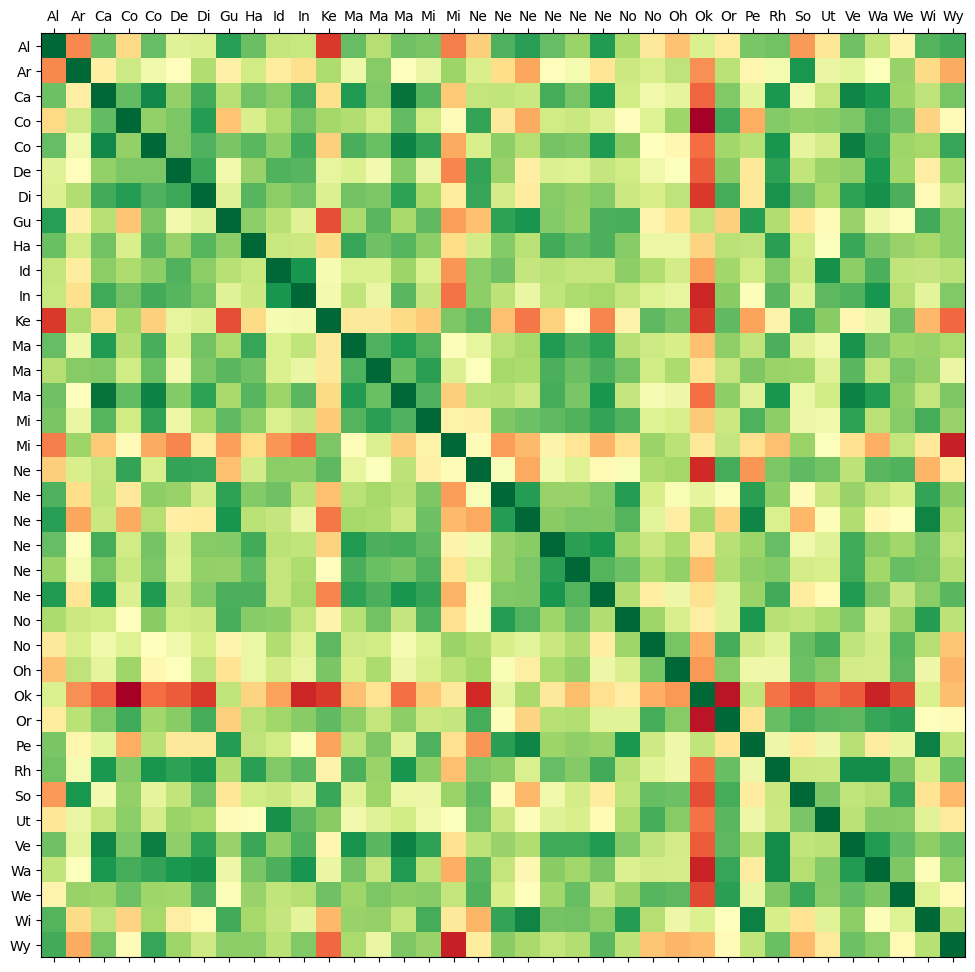

In [32]:
labels = [c[:2] for c in min_wage_corr.columns]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)


ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
plt.show()